# Train a Deep Neural Network on MNIST Dataset and Try to achieve maximum accuracy 

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras

### Load Kaggle Dataset

We're going to use kaggle's mnist dataset for now but in real world scenerios we might not be that lucky to get all cleaned up and structured data. Usually the images would be noisy or curropted (some pixels are messed up).
I have downloaded the data on my machine locally.You could also find at https://www.kaggle.com/c/digit-recognizer/data .

In [2]:
train_data=pd.read_csv('../Data/digit-recognizer/train.csv')
test_data=pd.read_csv('../Data/digit-recognizer/test.csv')

### Data-Prepration

Not much data prepration is required here as data is already structures and cleaned.
Even if we know that there's no missing data but let's check it just in case.

In [3]:
#top 10 features with maximum missing values 
np.sum(train_data[train_data.columns].isna()).sort_values(ascending=False)[:10]

pixel783    0
pixel267    0
pixel265    0
pixel264    0
pixel263    0
pixel262    0
pixel261    0
pixel260    0
pixel259    0
pixel258    0
dtype: int64

see! no missing data here.
now let's convert this data into numpy arrays. Why? ,because when numpy arrays provide more flexibility (that's how i feel) also, we'll be feeding our CNN matrix representstion of images (reshaping them to 28x28) which i feel is easier to do with numpy.

In [4]:
#first we need to saperate labels from image data
train_label=train_data.label
train_data.drop('label',inplace=True,axis=1)

In [5]:
#just checking 
train_data.shape,train_label.shape

((42000, 784), (42000,))

In [6]:
#Now lets convert everything to numpy arrays
x_train=np.array(train_data).reshape((-1,28,28))  # []x28x28
y_train=np.array(train_label).reshape((-1,1))     # []x1
x_test=np.array(test_data).reshape((-1,28,28))    # []x28x28

We'll also need validation set to moniter validation loss during training our CNN, for this job we can use sklearn's **train_test_split** .

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train)

In [8]:
x_train.shape,x_test.shape,x_val.shape,y_train.shape,y_val.shape

((31500, 28, 28), (28000, 28, 28), (10500, 28, 28), (31500, 1), (10500, 1))

Now we have numpy arrays every where, Such a nice place. Lets look at few random images and lets see how our data looks like.

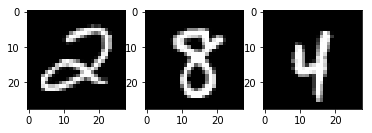

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(1,4):
    plt.subplot(1,3,i)
    plt.imshow(x_train[np.random.randint(x_train.shape[0])],cmap='gray')

Well they do look like someone wrote them with hand

Last step in data prep would be normalization as DNN (Deep Neural Nets) expects input between 0 and 1.

In [10]:
#This step is actually quite easy
x_train=x_train/255
x_test=x_test/255
x_val=x_val/255

### Build and test CNNs

Here I'm skipping the process of fine-tunning hyperparameters, because I already have some idea of which one will be good enough from my past experiencw with this dataset.
But if i had to explain how i found these hyper parameters which in this case are dropout rate and epochs (remember more hyperparameters you bring in the picture more will it be computationally expensive to do the exhaustive search, Therefore we should consider the performance vs cost trade-off at the begining of project) then it would be as follows:

    1. Grid Search: As these small time projects are not that computationally expensive we can guess a few values for each hyperparameter and try out each combination.
    2. Randomized Search: We can use this method when hyperparamer search space is too large for Grid Search. This method is same as Grid Search but instead of trying
       all combinations we try given number of random combinations.

In [11]:
from tensorflow.keras.layers import Conv2D,Dense,ReLU,Softmax,AveragePooling2D,Dropout

We need to reshape our images to (-1,28,28,1), where ***1*** signifies our image is gray scale, if our image would have been RGB the new shape would have been (-1,28,28,3) i.e. three color channels.

In [12]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
x_val=x_val.reshape(-1,28,28,1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten#create model
model = Sequential()#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D())
model.add(Dropout(0.4))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(Dropout(0.4))
model.add(Conv2D(16,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(100,activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early=keras.callbacks.EarlyStopping(monitor='val_acc',patience=10)
history=keras.callbacks.History()

hist=model.fit(x_train, y_train, epochs=50,callbacks=[history],validation_data=(x_val,y_val))

W0811 19:15:16.388879 14520 deprecation.py:506] From E:\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 31500 samples, validate on 10500 samples
Epoch 1/50
31500/31500 [==============================] - 10s 324us/sample - loss: 0.5997 - acc: 0.8005 - val_loss: 0.1491 - val_acc: 0.9533
Epoch 2/50
31500/31500 [==============================] - 5s 166us/sample - loss: 0.2276 - acc: 0.9278 - val_loss: 0.0944 - val_acc: 0.9712
Epoch 3/50
31500/31500 [==============================] - 5s 168us/sample - loss: 0.1760 - acc: 0.9443 - val_loss: 0.0730 - val_acc: 0.9784
Epoch 4/50
31500/31500 [==============================] - 5s 163us/sample - loss: 0.1539 - acc: 0.9519 - val_loss: 0.0650 - val_acc: 0.9801
Epoch 5/50
31500/31500 [==============================] - 5s 160us/sample - loss: 0.1343 - acc: 0.9576 - val_loss: 0.0629 - val_acc: 0.9810
Epoch 6/50
31500/31500 [==============================] - 5s 158us/sample - loss: 0.1197 - acc: 0.9623 - val_loss: 0.0501 - val_acc: 0.9830
Epoch 7/50
31500/31500 [==============================] - 5s 167us/sample - loss: 0.1123 - acc: 0.9648 - val_

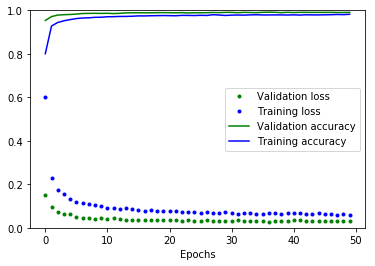

(36, 36)

In [14]:
plt.plot(hist.history['val_loss'],'g.',label='Validation loss')
plt.plot(hist.history['loss'],'b.',label='Training loss')
plt.plot(hist.history['val_acc'],'g-',label='Validation accuracy')
plt.plot(hist.history['acc'],'b-',label='Training accuracy')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('Epochs')
plt.show()
np.argmin(hist.history['val_loss']),np.argmax(hist.history['val_acc'])

The plot shown above shows variation in performance parameters of our CNN. We get maximum validation accuracy around epoch=31 and minimum validation loss around epoch=39. 
Now all we have to do is train this CNN on complete training data set and see how we perform if the competetion